SRN: PES1UG20CS445
Name:SUNDEEP A
ASSIGNMENT ID: Student_31

In [176]:
import pandas as pd
import numpy as np

In [177]:
df=pd.read_csv("/content/31.csv")#reading the file
df.head(2)#printing the first two fields to refer to the data

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,98.0,97.0,88.0
1,male,group E,high school,free/reduced,none,95.0,115.0,102.0


In [178]:
df.info()#so math has 6 null values,reading has 4 null values,writing has 5 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race                         1000 non-null   object 
 2   parental level of education  998 non-null    object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   994 non-null    float64
 6   reading score                996 non-null    float64
 7   writing score                995 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [179]:
df['math score'] = df['math score'].fillna(df['math score'].mean())#replacing null values in math with its mean
df['reading score'] = df['reading score'].fillna(df['reading score'].mean())#replacing null values in reading with its mean
df['writing score'] = df['writing score'].fillna(df['writing score'].mean())#replacing null values in writing with its mean

In [180]:
df.info()#all the null values have been replaced


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race                         1000 non-null   object 
 2   parental level of education  998 non-null    object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [181]:
df = df.dropna(subset=['parental level of education'], how='any')#removing teh rows whose categorical data is NAN
df.info()#2 rows have been deleted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       998 non-null    object 
 1   race                         998 non-null    object 
 2   parental level of education  998 non-null    object 
 3   lunch                        998 non-null    object 
 4   test preparation course      998 non-null    object 
 5   math score                   998 non-null    float64
 6   reading score                998 non-null    float64
 7   writing score                998 non-null    float64
dtypes: float64(3), object(5)
memory usage: 70.2+ KB


In [182]:
df['math score']=df['math score']-min(df['math score'])#getting math score within 100
df['reading score']=df['reading score']-min(df['reading score'])#getting reading score within 100
df['writing score']=df['writing score']-min(df['reading score'])#getting writing score within 100


In [183]:
df['percentage'] = (df['math score']+df['reading score']+df['writing score'])/3#storing percentage
df

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,77.0,76.0,88.0,80.333333
1,male,group E,high school,free/reduced,none,74.0,94.0,102.0,90.000000
2,male,group C,associate's degree,free/reduced,none,95.0,94.0,107.0,98.666667
3,female,group A,master's degree,free/reduced,none,52.0,61.0,27.0,46.666667
4,male,group B,high school,free/reduced,none,81.0,82.0,89.0,84.000000
...,...,...,...,...,...,...,...,...,...
995,female,group A,high school,free/reduced,completed,93.0,98.0,109.0,100.000000
996,male,group D,high school,free/reduced,none,67.0,59.0,69.0,65.000000
997,male,group C,some high school,free/reduced,none,64.0,75.0,79.0,72.666667
998,male,group A,high school,free/reduced,completed,51.0,82.0,91.0,74.666667


In [184]:
df['Grades'] = df.apply(lambda x : 'F' if x['percentage']<40 else ('D' if x['percentage']>=40 and x['percentage']<60  else ('C' if x['percentage']>=60 and x['percentage']<70 else ('B' if x['percentage']>=70 and x['percentage']<80  else('A' if x['percentage']>=80 and x['percentage']<90else('S' if x['percentage']>=90 else "--"))))),axis=1)
df['Grades'].value_counts()

B    272
A    209
C    191
D    159
S    148
F     19
Name: Grades, dtype: int64

In [185]:
df#so grades column contains grades

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,Grades
0,female,group B,bachelor's degree,standard,none,77.0,76.0,88.0,80.333333,A
1,male,group E,high school,free/reduced,none,74.0,94.0,102.0,90.000000,S
2,male,group C,associate's degree,free/reduced,none,95.0,94.0,107.0,98.666667,S
3,female,group A,master's degree,free/reduced,none,52.0,61.0,27.0,46.666667,D
4,male,group B,high school,free/reduced,none,81.0,82.0,89.0,84.000000,A
...,...,...,...,...,...,...,...,...,...,...
995,female,group A,high school,free/reduced,completed,93.0,98.0,109.0,100.000000,S
996,male,group D,high school,free/reduced,none,67.0,59.0,69.0,65.000000,C
997,male,group C,some high school,free/reduced,none,64.0,75.0,79.0,72.666667,B
998,male,group A,high school,free/reduced,completed,51.0,82.0,91.0,74.666667,B


Text(0, 0.5, 'Frequency')

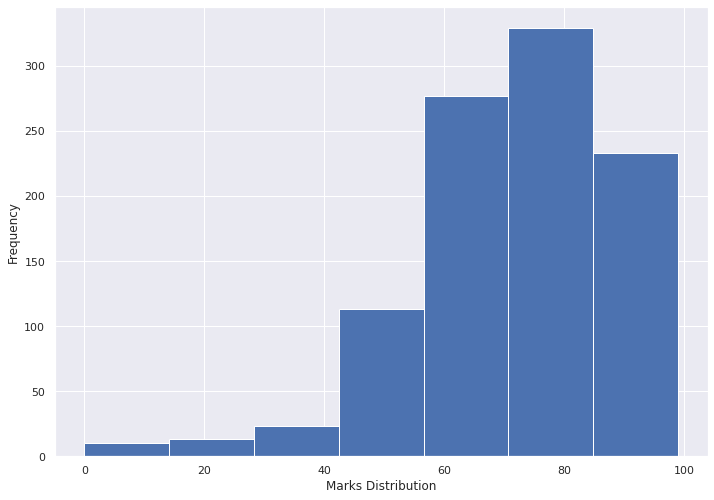

In [186]:
df['reading score'].plot(kind='hist',bins=7)
plt.xlabel("Marks Distribution")
plt.ylabel("Frequency")


Histogram is used to visualize the reading score
Histogram:  Explained in PDF

In [187]:
dp=pd.DataFrame()
dp["parental level of education"]=df["parental level of education"]
dp["percentage"]=df["percentage"]
dp["gender"]=df["gender"]
dp#creating new dataframe and storing only parental level ,percentage,gender

,parental level of education,percentage,gender
0,bachelor's degree,80.333333,female
1,high school,90.000000,male
2,associate's degree,98.666667,male
3,master's degree,46.666667,female
4,high school,84.000000,male
...,...,...,...
995,high school,100.000000,female
996,high school,65.000000,male
997,some high school,72.666667,male
998,high school,74.666667,male


In [188]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


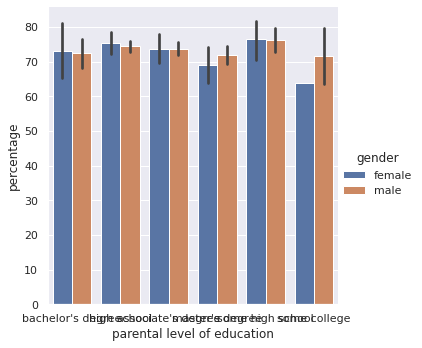

In [189]:

sns.factorplot(x="parental level of education",y="percentage",hue="gender",data=dp,kind="bar")
#creating graph percentage along y-axis,parential  level along x-axis,separated by gender

Task Questions

1.a)

In [190]:
srs=df.sample(n=100)
srs#creating simple random sample

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,Grades
335,male,group A,high school,free/reduced,none,66.000000,72.0,80.0,72.666667,B
729,male,group A,high school,standard,completed,58.000000,43.0,92.0,64.333333,C
580,male,group B,some high school,free/reduced,completed,86.000000,96.0,113.0,98.333333,S
389,male,group E,high school,free/reduced,none,78.000000,74.0,89.0,80.333333,A
735,male,group B,associate's degree,free/reduced,none,72.000000,61.0,73.0,68.666667,C
...,...,...,...,...,...,...,...,...,...,...
760,female,group E,high school,free/reduced,completed,58.000000,76.0,78.0,70.666667,B
717,male,group D,high school,free/reduced,completed,95.000000,95.0,113.0,101.000000,S
168,male,group E,associate's degree,free/reduced,completed,73.000000,87.0,92.0,84.000000,A
405,female,group E,master's degree,free/reduced,none,68.000000,77.0,82.0,75.666667,B


1.b)

In [191]:
strati=df.groupby('race', group_keys=False).apply(lambda x: x.sample(20))
strati#creating stratified random sampling of size 100,race is used as strata

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,Grades
546,male,group A,associate's degree,free/reduced,none,97.0,99.0,111.0,102.333333,S
3,female,group A,master's degree,free/reduced,none,52.0,61.0,27.0,46.666667,D
8,male,group A,some high school,free/reduced,completed,69.0,68.0,81.0,72.666667,B
447,male,group A,high school,free/reduced,none,91.0,85.0,94.0,90.000000,S
416,male,group A,high school,free/reduced,completed,76.0,78.0,82.0,78.666667,B
...,...,...,...,...,...,...,...,...,...,...
96,male,group E,bachelor's degree,free/reduced,none,70.0,70.0,76.0,72.000000,B
796,male,group E,some high school,free/reduced,completed,75.0,74.0,84.0,77.666667,B
492,male,group E,high school,free/reduced,none,88.0,87.0,104.0,93.000000,S
184,male,group E,master's degree,free/reduced,completed,50.0,56.0,63.0,56.333333,D


1.c)

In [192]:
simple_mean=srs['math score'].mean()
strati_mean=strati['math score'].mean()
data_mean=df['math score'].mean()
print("Simple Random Sampling Error =",abs(data_mean-simple_mean))
print("Stratified Random Sampling Error =",abs(data_mean-strati_mean))
#error is low in simple random sampling

Simple Random Sampling Error = 0.11514191360586779
Stratified Random Sampling Error = 1.323509997862942


1.d)

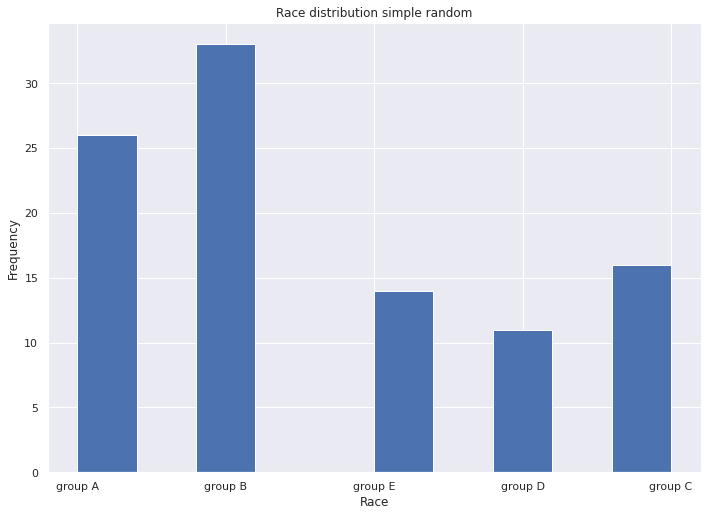

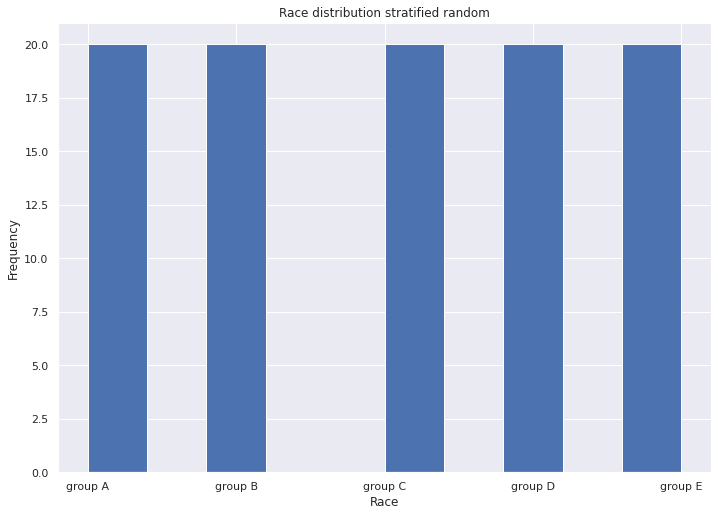

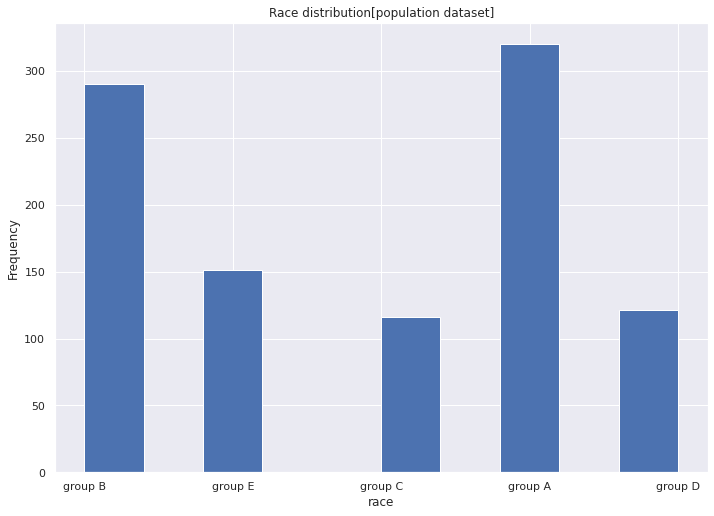

In [193]:
srs['race'].hist(histtype='stepfilled',)
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race distribution simple random')
plt.show()
strati['race'].hist(histtype='stepfilled',)
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race distribution stratified random')
plt.show()
df['race'].hist(histtype='stepfilled')
plt.xlabel('race')
plt.ylabel('Frequency')
plt.title('Race distribution[population dataset]')
plt.show()

Conclusion:
simple random sample is more accurate representation of the population dataset because its proportions are similar to that of population dataset

but in stratified dataset, it is not accurate representation of the population dataset, because here the sample size of each race is same but it is not the same  in population dataset

2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


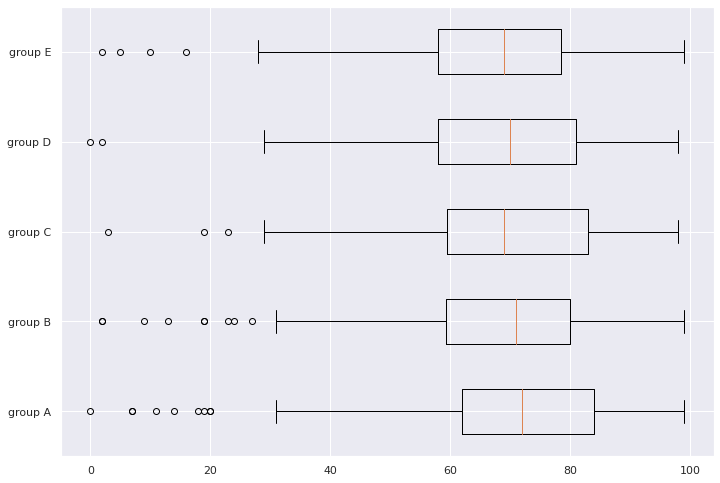

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


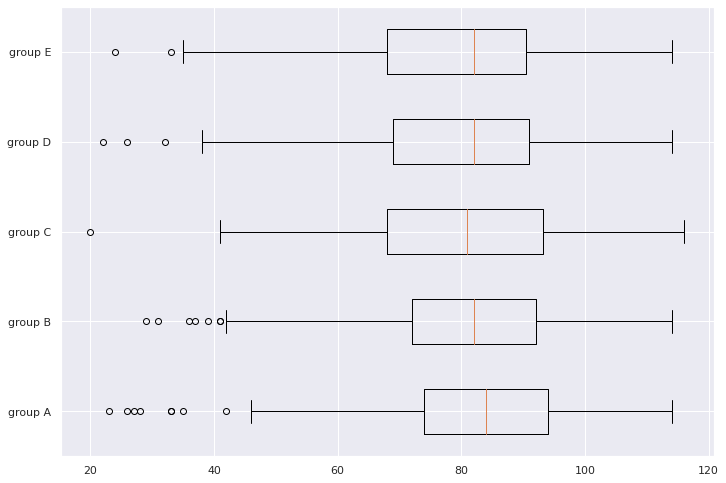

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


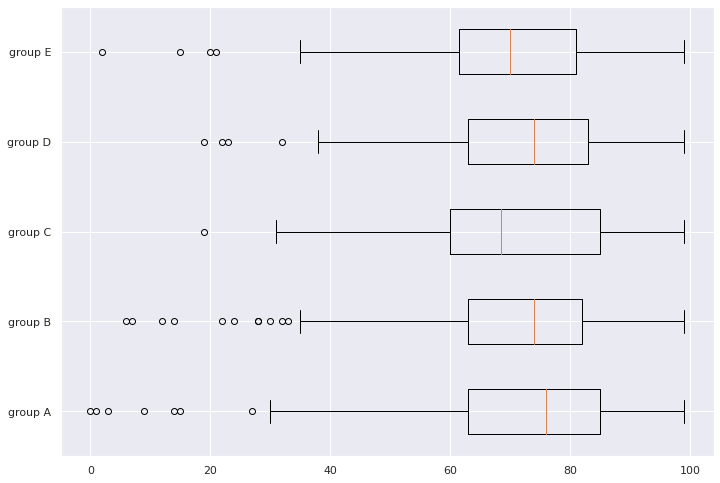

In [194]:
gam=df[df['race']=='group A']['math score']
gbm=df[df['race']=='group B']['math score']
gcm=df[df['race']=='group C']['math score']
gdm=df[df['race']=='group D']['math score']
gem=df[df['race']=='group E']['math score']
values=[gam,gbm,gcm,gdm,gem]
plt.boxplot(values, vert=False,labels=['group A','group B','group C','group D','group E'])
plt.show()
gaw=df[df['race']=='group A']['writing score']
gbw=df[df['race']=='group B']['writing score']
gcw=df[df['race']=='group C']['writing score']
gdw=df[df['race']=='group D']['writing score']
gew=df[df['race']=='group E']['writing score']
values1=[gaw,gbw,gcw,gdw,gew]
plt.boxplot(values1, vert=False,labels=['group A','group B','group C','group D','group E'])
plt.show()
gar=df[df['race']=='group A']['reading score']
gbr=df[df['race']=='group B']['reading score']
gcr=df[df['race']=='group C']['reading score']
gdr=df[df['race']=='group D']['reading score']
ger=df[df['race']=='group E']['reading score']
values2=[gar,gbr,gcr,gdr,ger]
plt.boxplot(values2, vert=False,labels=['group A','group B','group C','group D','group E'])
plt.show()

reading score has the maximum number of outliers